# Exploratory Data Analysis

## Objectives
* Explore the relationships between variables
* Gain insights about the data reletive to the problem


#### Import libraries and load data

In [11]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# load data

train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
explore = pd.concat([train, val])

explore.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
1,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
2,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
3,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


# 1. Explore relationships between the target and each other variable

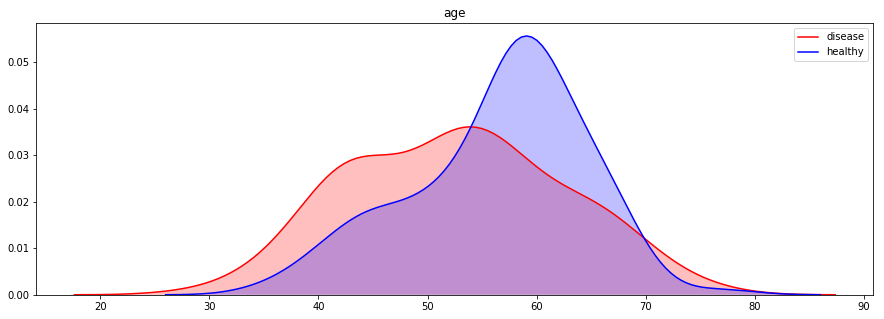

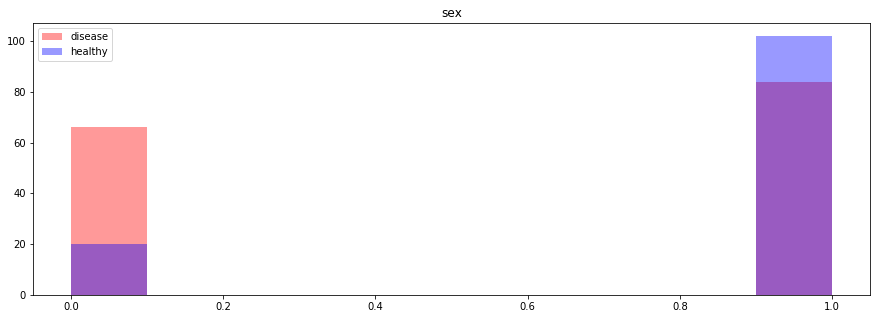

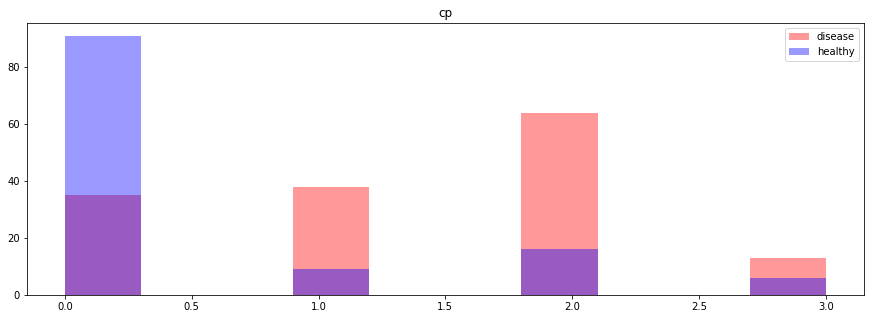

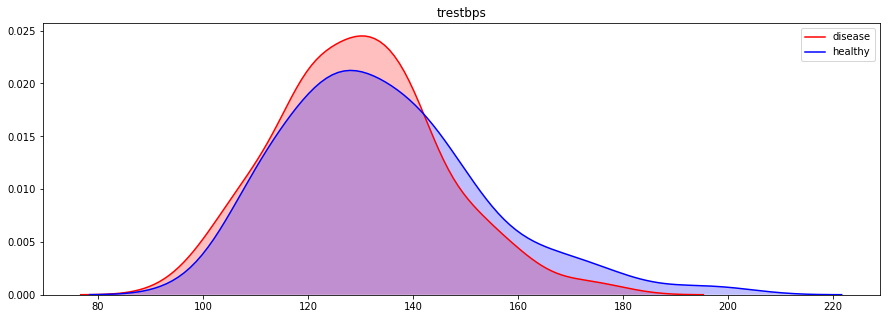

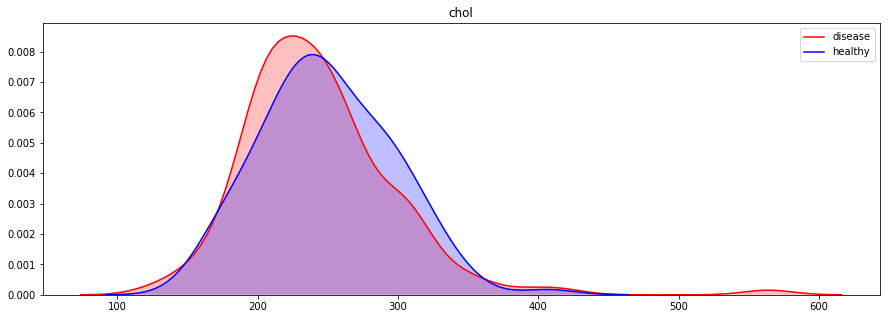

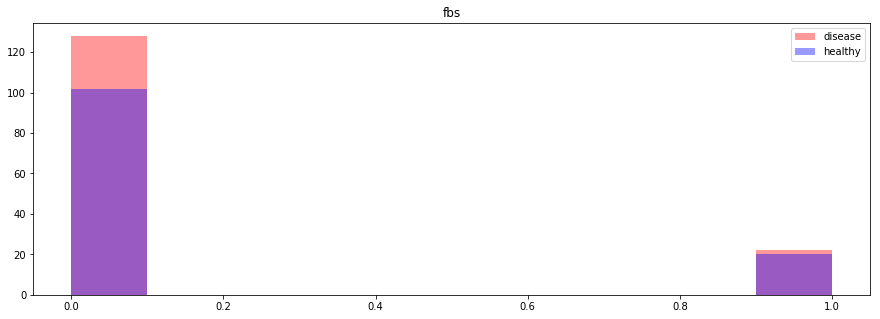

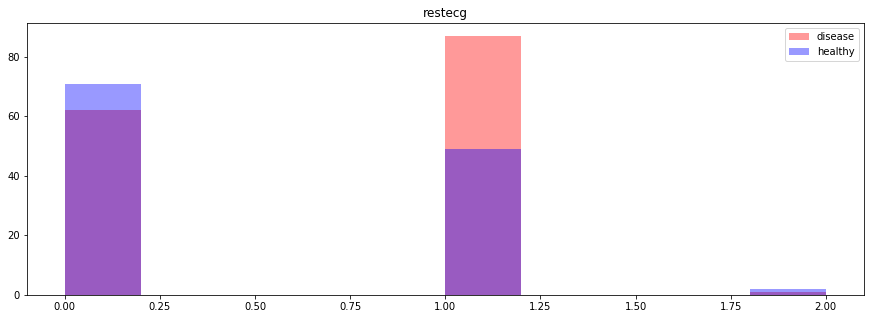

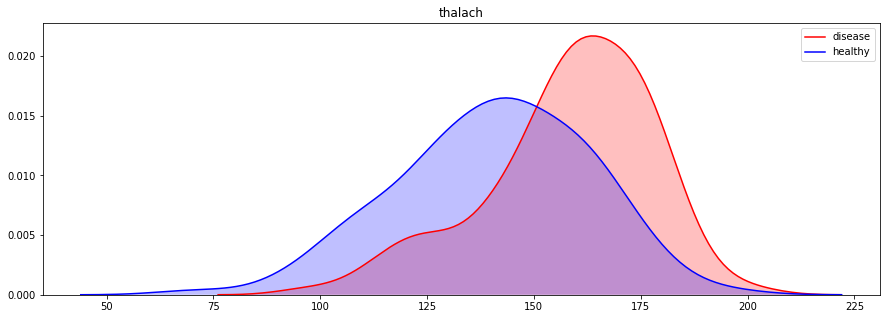

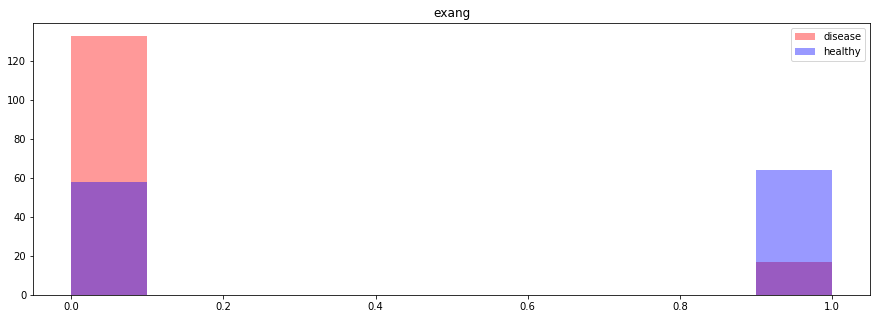

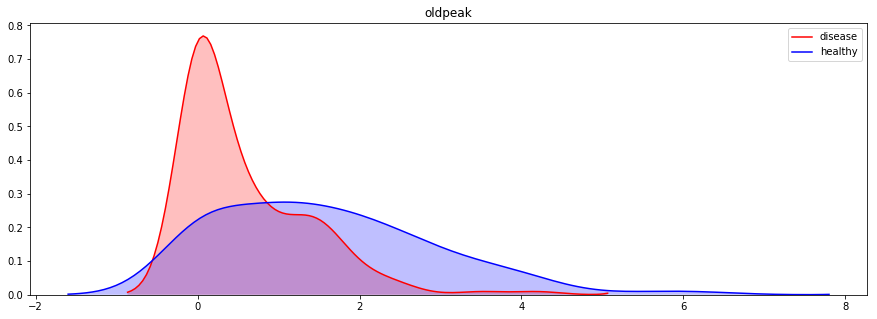

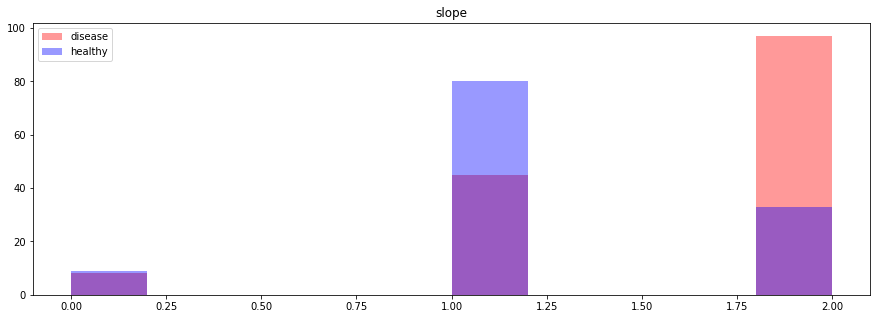

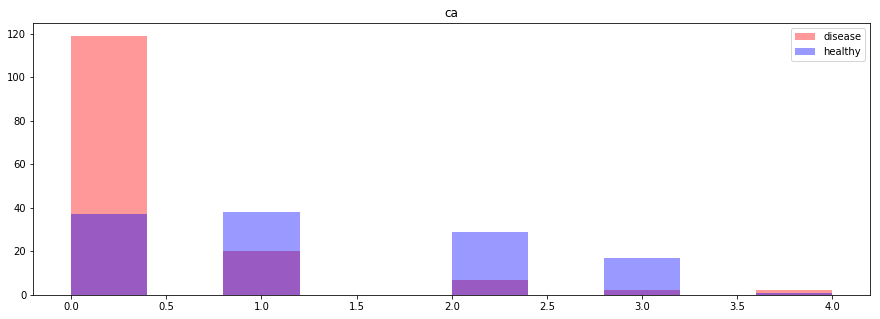

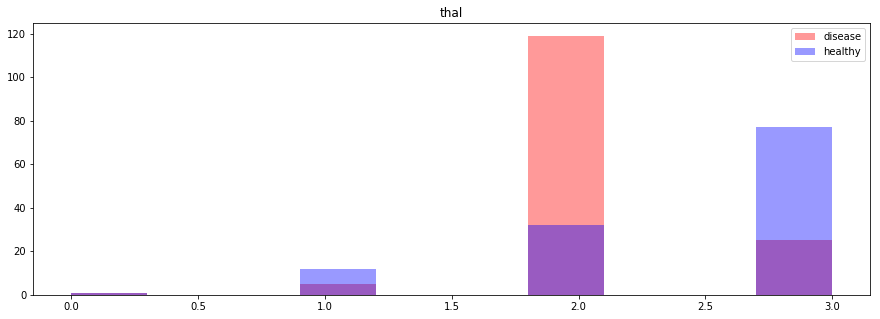

In [10]:
disease = explore[explore.target == 1]
healthy = explore[explore.target == 0]

for col in explore.columns:
    if col != "target":
        if explore[col].nunique() > 10:
            plt.figure(figsize=(15, 5))
            sns.kdeplot(disease[col], shade=True, color="red", label="disease")
            sns.kdeplot(healthy[col], shade=True, color="blue", label="healthy")
            plt.title(col)
            plt.show()
        
        else:
            plt.figure(figsize=(15, 5))
            plt.hist(disease[col], alpha=0.4, color="red", label="disease")
            plt.hist(healthy[col], alpha=0.4, color="blue", label="healthy")
            plt.legend()
            plt.title(col)
            plt.show()

#### Findings
* It seems females are more likely to be diseased
* It seems people with chest pain are more likely to be diseased
* It seems people without exercise induced anigma are more likely to be diseased
* It seems people with low ST depression induced by exercise relative to rest are more likely to be diseased
* It seems people with a high slope of the peak exercise ST segment are much more likely to be diseased
* It seems people with a low number of major vessels colored by flourosopy are more likely to be diseased
* Finally it seems people with a thal level of 2 are much more likely to be diseased

I can also one-hot-encode the catigorical columns and directly check the pearson correlation with the target.

In [19]:
# one hot encode catigorical columns

# get categorical columns
cat_cols = []
for col in explore.columns:
    if (explore[col].nunique() < 10) & (col != "target"):
        cat_cols.append(col)
        
# get dummies
dummies = pd.DataFrame([])
for col in cat_cols:
    dummy_col = pd.get_dummies(explore[col], prefix=col, drop_first=True)
    dummies = pd.concat([dummies, dummy_col], axis=1)

# replace columns with dummies
explore_dummies = explore.copy()
explore_dummies.drop(cat_cols, axis=1, inplace=True)
explore_dummies = pd.concat([explore_dummies, dummies], axis=1)

explore_dummies.head()

    

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,68,120,211,115,1.5,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,60,140,185,155,3.0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,51,110,175,123,0.6,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,57,124,261,141,0.3,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0


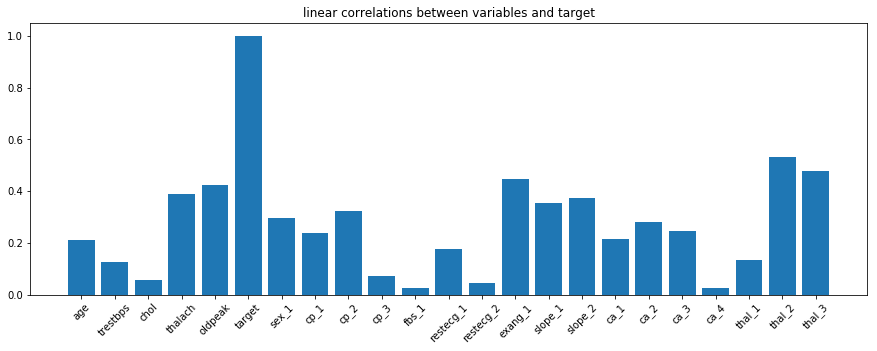

In [50]:
# explore correlation
correlations = []
for col in explore_dummies.columns:
    correlations.append(abs(explore_dummies.corr()["target"][col]))
    
plt.figure(figsize=(15, 5))
plt.bar(explore_dummies.columns, correlations)
plt.title("linear correlations between variables and target")
plt.xticks(rotation=45)
plt.show()

# 2. Check variables correlation to target when split by sex

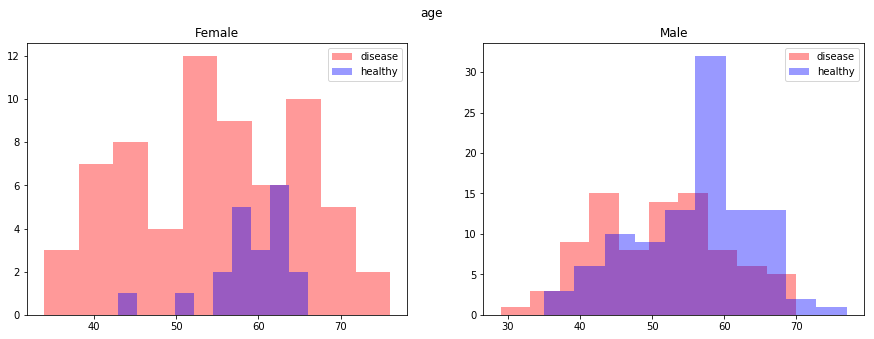

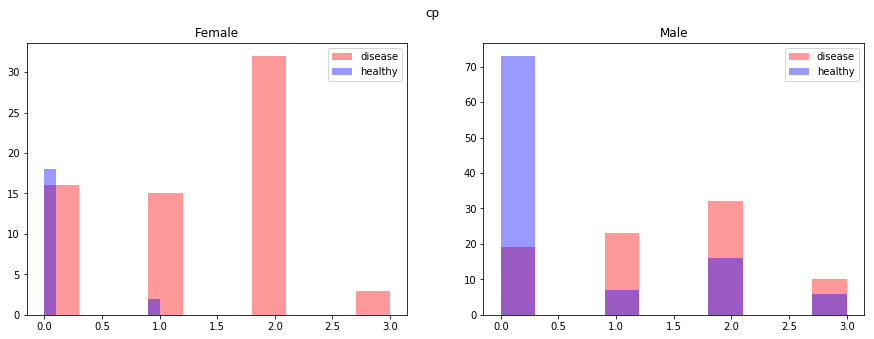

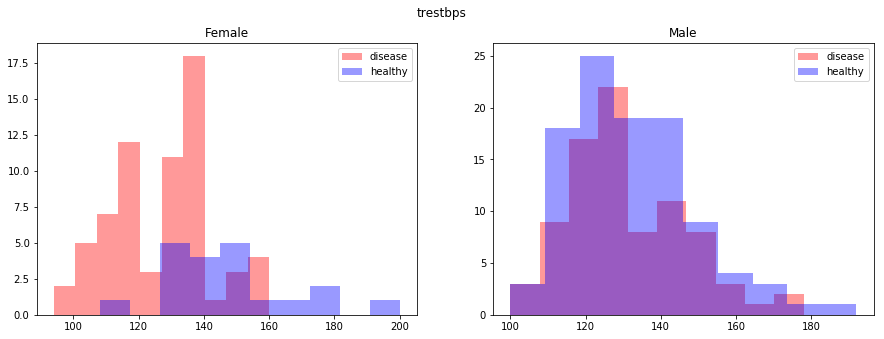

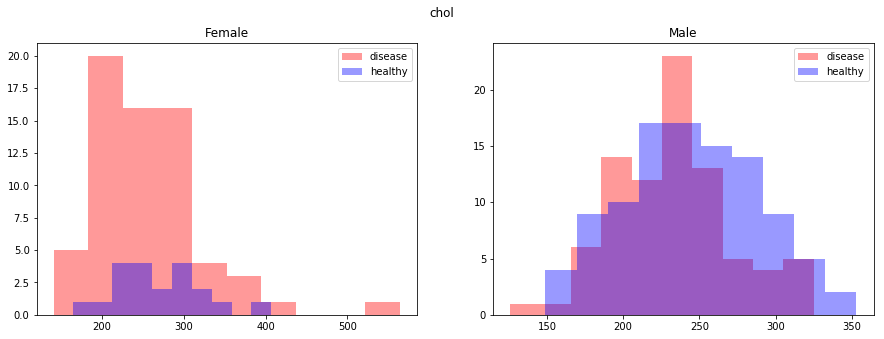

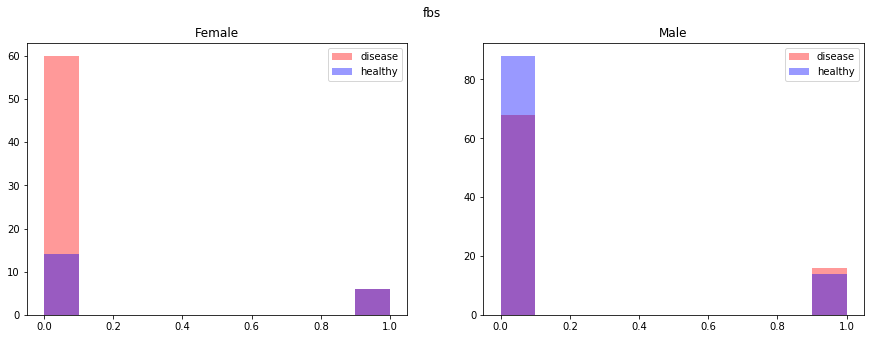

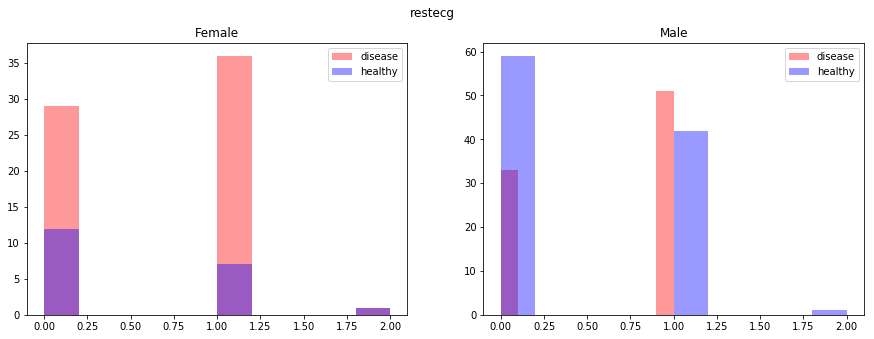

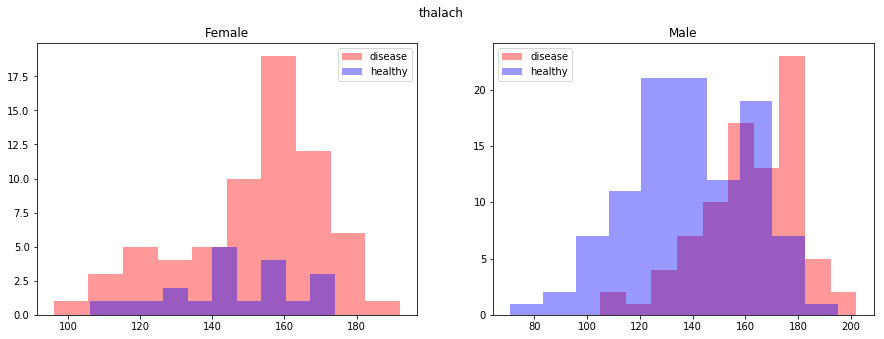

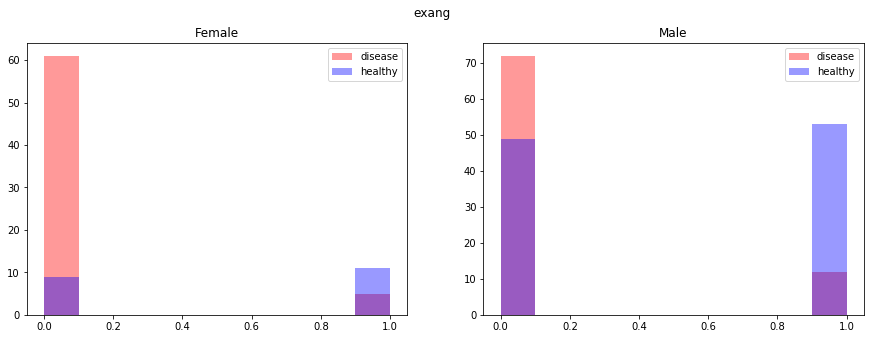

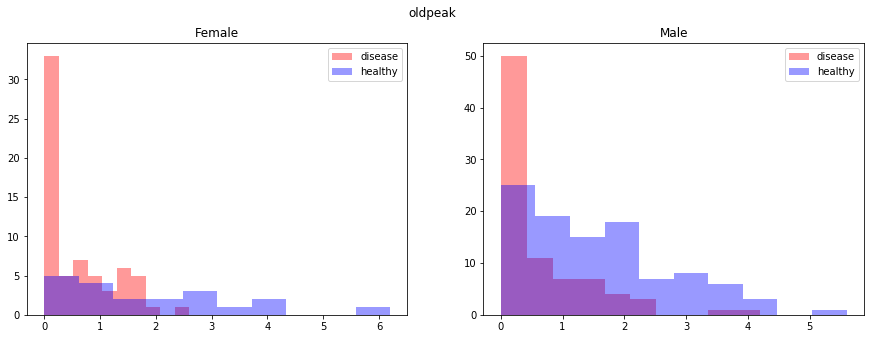

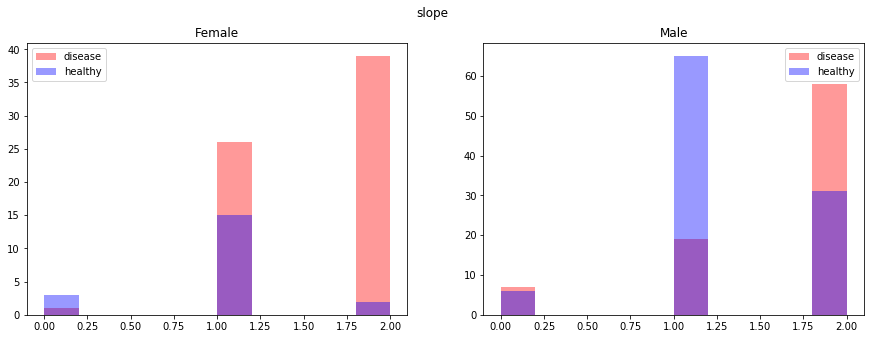

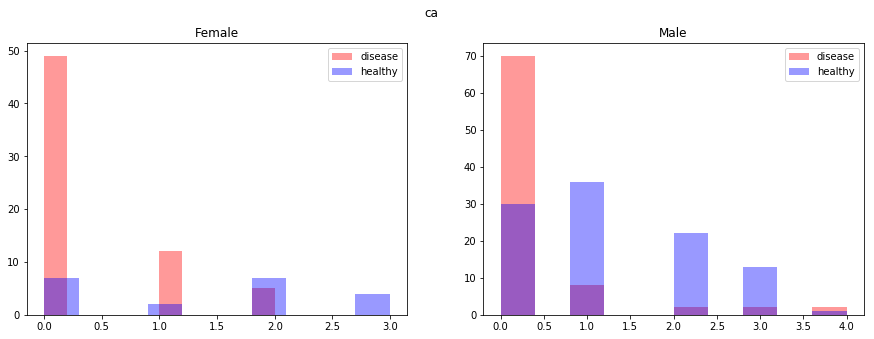

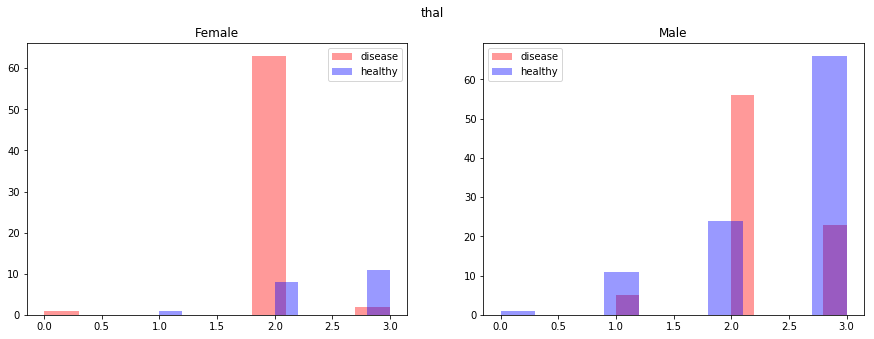

In [57]:
for col in explore.columns:
    if (col != "target") & (col != "sex"):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        ax1.set_title("Female")
        ax1.hist(disease[disease.sex == 0][col], color="red", alpha = 0.4, label="disease")
        ax1.hist(healthy[healthy.sex == 0][col], color="blue", alpha=0.4, label="healthy")
        ax1.legend()       
        ax2.set_title("Male")
        ax2.hist(disease[disease.sex == 1][col], color="red", alpha = 0.4, label="disease")
        ax2.hist(healthy[healthy.sex == 1][col], color="blue", alpha=0.4, label="healthy")
        ax2.legend()
        fig.suptitle(col)
        plt.show()

##### Insights
* It seems that a low trestbps for females is more dangerous than it is for men
* A low fasting blood sugar is more dangerous for females than for men